In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['species'], axis=1)
Y = df['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

In [9]:
Y_pred = gnb.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9736842105263158

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 14]], dtype=int64)

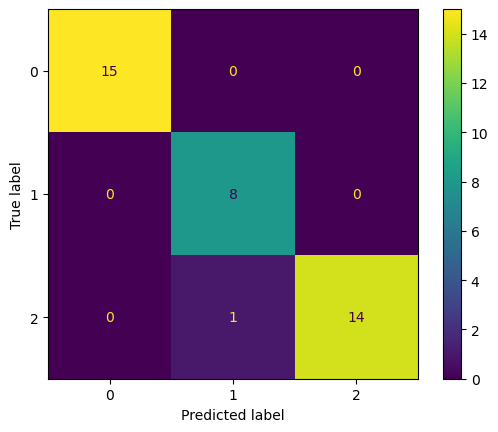

In [12]:
ConfusionMatrixDisplay(cm).plot()

In [13]:
TP = cm[0][0]
FP = cm[1][0] + cm[2][0]
FN = cm[0][1] + cm[0][2]
TN = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]

print(f'TP: {TP}')
print(f'FP: {FP}')
print(f'TN: {TN}')
print(f'FN: {FN}')

TP: 15
FP: 0
TN: 23
FN: 0


In [14]:
accuracy = ((TP + TN) / (TP + TN + FP + FN))
error = 1 - accuracy
precision = ((TP) / (TP + FP))
recall = ((TP) / (TP + FN))

In [15]:
print(f'accuracy: {accuracy}')
print(f'error: {error}')
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 1.0
error: 0.0
precision: 1.0
recall: 1.0


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print(f'accuracy: {accuracy_score(Y_test, Y_pred)}')
print(f'error: {1-accuracy_score(Y_test, Y_pred)}')

accuracy: 0.9736842105263158
error: 0.02631578947368418
